# Proyecto 1 Clasificación y Regresión Lineal.
## Guillermo Aguilera y Carol Jimena Alvarado.

Para este proyecto se resolverá un ejercicio de *clasificación* y uno de *regresión lineal*. Por favor siga las indicaciones para cada uno de los proyectos. El informe se debe entregar en un notebook de jupyter, donde se explique claramente cada uno de los procesos realizados junto con su justificación, de ser necesario. La entrega se puede hacer en grupos de dos personas. Recuerde que para los próximos proyectos los grupos no pueden ser los mismos. La entrega se debe realizar a más tardar el día **10 de septiembre del 2024, a las 11:59 p.m.** utilziando el link habilitado en la plataforma Teams. También tenga en cuenta que el nombre de los integrantes del equipo debe estar debidamente marcado. Es responsabilidad de ambos miembros del equipo verificar que su nombre este indicado. Si por alguna razón el notebook no tiene ningún nombre o hace falta un nombre, se colocará un cero a la persona cuyo nombre no este en la entrega.


## Clasificación lineal: MNIST

La base de datos MNIST se considera un ejercicio clasico en el área de machine learning. Esta base de datos cuenta con un conjunto de imagenes de digitos manuscritos desde el 0 hasta el 9, la cual se encuentra en en la libreria de scikit-learn. Información sobre el dataset la pueden encontrar [aquí](http://yann.lecun.com/exdb/mnist/), mientras que una explicación sobre la función en python, especificamente la libreria sci-kit learn, pueden encontrarla [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Está base de dato tiene imagénes de carácteres escritos desde el 0 hasta el 9. El profesor Alexander quiere que ustedes utilicen sus conocimientos en Machine Learning para resolver este problema.

Para este problema deben realizar las siguientes tareas:

1. Cargen los datos *digits* de la librería scikit learn.
2. Realicen un análisis descriptivo de la información contenida en las imagenes. Grafiquen los números, discutan sobre sus carácteristicas y demás información que consideren importante.
3. Implementen un clasificador usando KNN. Determine una forma de evaluar el rendimiento de este clasificador para diferentes valores de K.
4. Implemente un clasificador utilizando regresión logística. Para esto desarrolle 10 clasificadores diferentes (porque se tienen 10 clases). Implemente la función de decisión de clase, escogiendo como clase la salida correspondiente al clasificador con mayor probabilidad.
5. Para cada uno de los 10 clasificadores, ubique los $\theta_i$, para $i\neq 0$,  en una matriz siguiendo el mismo orden que las matrices de los datos de entrenamiento, y realice un mapa de calor para cada clasificador, indicando la clase que detecta.
6. Implemente un clasificador multinomial utilizando funciones de scikit-learn.
7. Compare los resultados.

Como el objetivo es evaluar sus conocimientos en clasificación, deben responder las siguientes preguntas:

1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?
2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logística? ¿Funciona uno mejor que otro?, ¿Porqué?
3. ¿El clasificador de regresión logistica presenta un buen rendimiento? ¿Cómo evaluan su rendimiento?¿Si el rendimiento no es bueno que cree se debe hacer para mejorarlo?
4. Al realizar el mapa de calor con los pesos de la regresión logística, para los diferentes clasificadores, ¿Qué puede notar? ¿Hay algun tipo de patrón?, ¿Sí, no, porqué?
5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clasificación y como se aplicó en este proyecto.

En este primer ejercicio del proyecto usaremos KNN y un clasificador utilizando regresión logística para clasificar MNIST (MOdified National Institute of Standards and Technology) una base de datos de digitos escritos a mano. Esta consiste de 60000 imagenes de entrenamiento y 10000 imagenes de testeo que son 28x28 pixelest de ancho. Una versión más simplificada contiene 5620 imagenes de 8x8 pixeles. La libreria *Scikit-learn* contiene un subset de esas imagenes.

## Cargando y entendiendo la data:

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

#Esto describe el dataset procesado conteniendo 1797 imagenes, Este dataset es más pequeño como se vera a continuación
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### Se extrae los features y las etiquetas de clase:

In [3]:
X = digits.data
y = digits.target

In [4]:
import pandas as pd
df = pd.DataFrame(data= y, columns=['targets'])
df

,targets
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [5]:
X.shape, y.shape

((1797, 64), (1797,))

*X* es bidimensional y tiene 1797 filas y 64 columnas. Las 64 columnas representan una versión "Aplanada" de la imagen 8x8.

El dataset de digitos consiste de imagenes 8x8 pixeles representando 1797 digitos escritos a mano (del 0 al 9). El objetivo es predecir a que digito una imagen representa. La versión importada de Scikit-learn solo contiene los 1797 ejemplos de TESTEO (estarían faltantes los 3823 de entrenamiento). Como se especifica en el dataset cada muestra tiene 64 características (# de atributos), que representa una imagen 8x8 con valores de píxel en el rango de 0-16 (Especificado en la información de atributos)

## Visualizando la data
Esta representación puede ser accedidad utiilizando **digits.images**, un arreglo tridimensional de 1797 imagenes, donde cada imagen es un arreglo de 8x8.

Por ejemplo revisemos la primera sample (arreglo de 8x8 de la intensidad de los pixeles):

In [6]:
digits.images.shape
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Para graficar los 10 digitos principales se usara el método *subplots* para graficar 3 filas de imagenes con 10 imagenes cada fila; cada imagen seria 15x6. Este método retorna una tupla conteniendo 2 elementos: La figura y un arreglo de objetos ejes (para cada subfigura). El método *ravel* es usado para **aplanar** el arreglo de ejes.

- figure, axes = plt.subplots(3,10. figsize(15,6)) : Crea una figura de 15x6 pulgadas conteniendo 30 subplots organizados en 3 filas y 10 columnas. Cada subplot tiene su propio objeto de ejes.

- Cada iteración del loop desempaca una tupla con 3 variables representados: Objeto ejes, imagen y valor objetivo.

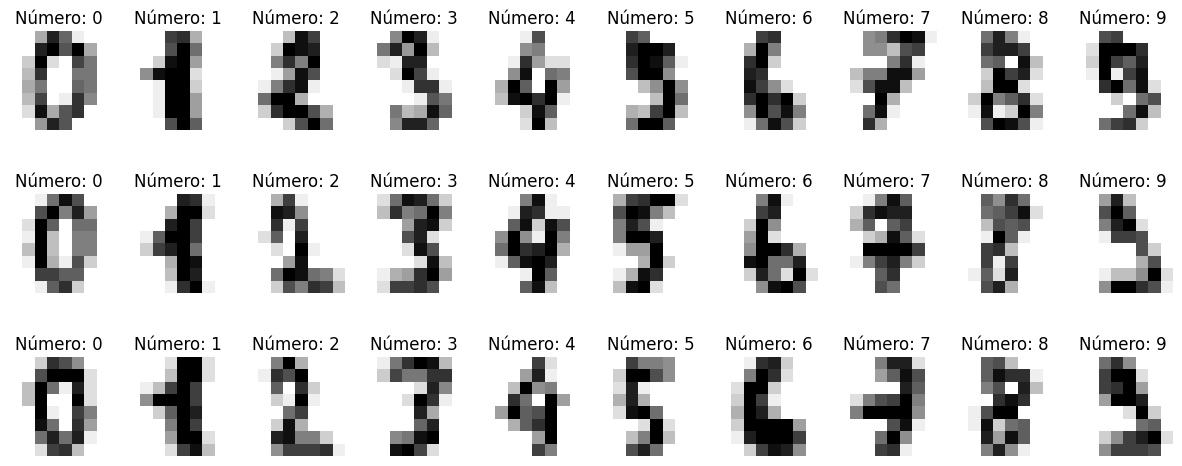

In [7]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(3,10,figsize=(15,6))

for ax,image,number in zip(axes.ravel(), digits.images, y) : # Itera sobre 30 ejes objeto
    ax.axis('off')                                         # No se vera la marca del eje (solo pixeles)
    ax.imshow(image, cmap = plt.cm.gray_r)                 
    ax.set_title('Número: ' + str(number))

## "Aplanando" los arreglos:

- Aveces los datos en arreglos multidimensionales necesitan ser "aplanados"/ **Flattened** a un arreglo de una sola dimensión. En el código de arriba axes es un arreglo bidimensional con 3 filas y 10 columnas. Para iterar con cada figura es necesario aplanarlo.

- En clasificación, los datos de las características de una muestra debe de ser almacenada en un arreglo de una sola dimensión y los datos de las características (Feature data) de TODAS las muestras debe de ser un arreglo bidimensional. Como  la Feature Data es una imágen 8x8 la solución es aplanarla. El metodo **ravel** aplana la data leyendo el arreglo fila por fila. La Feature data (almacenada en X) contiene la versión aplanada de cada arreglo.

In [8]:
print("Feature data de todas las muestras es un arreglo bidimensional 8 por 8 ")
print(X)

Feature data de todas las muestras es un arreglo bidimensional 8 por 8 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


## Clasificación por KNN en MNIST usando training y testing datasets.

### Se dividide la data en Training y Testing:

- random_state=99 es un número que se usa para asegurar que la división de los datos sea reproducible; es decir, si ejecutas el código varias veces, obtendrás la misma división.

- stratify=y asegura que la proporción de cada clase (en este caso, cada dígito del 0 al 9) sea la misma tanto en el conjunto de entrenamiento como en el de prueba. Esto es importante para evitar sesgos en la distribución de las clases.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=99, stratify = y)


In [10]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(594,)

###  Ajustando el modelo:

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Predicciones en la dataset de TEST:

In [12]:
y_pred = knn.predict(X_test)
y_pred

array([0, 9, 4, 7, 0, 6, 5, 8, 3, 5, 1, 1, 6, 6, 1, 9, 1, 3, 8, 0, 0, 1,
       4, 3, 7, 5, 1, 5, 2, 3, 5, 0, 5, 2, 2, 3, 0, 6, 9, 3, 4, 9, 7, 4,
       5, 8, 7, 2, 5, 1, 6, 7, 7, 8, 4, 5, 1, 0, 3, 7, 6, 7, 0, 7, 3, 6,
       7, 2, 6, 1, 5, 0, 3, 9, 3, 1, 0, 4, 3, 0, 2, 7, 3, 7, 7, 9, 1, 4,
       7, 4, 1, 5, 1, 0, 4, 0, 8, 7, 6, 7, 9, 9, 4, 4, 8, 9, 0, 8, 3, 8,
       5, 5, 2, 2, 4, 0, 8, 3, 2, 2, 9, 5, 3, 6, 9, 2, 9, 0, 0, 0, 0, 5,
       4, 2, 8, 6, 9, 4, 4, 6, 7, 3, 8, 0, 6, 7, 2, 1, 8, 0, 7, 3, 1, 7,
       4, 3, 4, 2, 1, 5, 3, 3, 6, 9, 2, 2, 0, 6, 7, 8, 1, 7, 3, 8, 2, 5,
       4, 9, 2, 0, 5, 0, 9, 1, 1, 2, 8, 7, 7, 6, 5, 5, 7, 6, 0, 5, 7, 1,
       4, 5, 9, 0, 5, 1, 9, 9, 5, 6, 6, 7, 4, 9, 5, 4, 8, 8, 1, 3, 3, 1,
       2, 2, 9, 1, 9, 6, 4, 3, 8, 5, 0, 9, 2, 8, 4, 6, 0, 2, 7, 2, 3, 6,
       1, 8, 9, 5, 6, 0, 8, 5, 8, 6, 5, 0, 3, 1, 7, 0, 7, 2, 8, 5, 1, 5,
       6, 9, 3, 0, 0, 3, 9, 4, 5, 0, 6, 1, 3, 3, 7, 4, 1, 4, 0, 7, 1, 7,
       2, 6, 5, 9, 0, 0, 9, 6, 6, 0, 5, 4, 0, 1, 4,

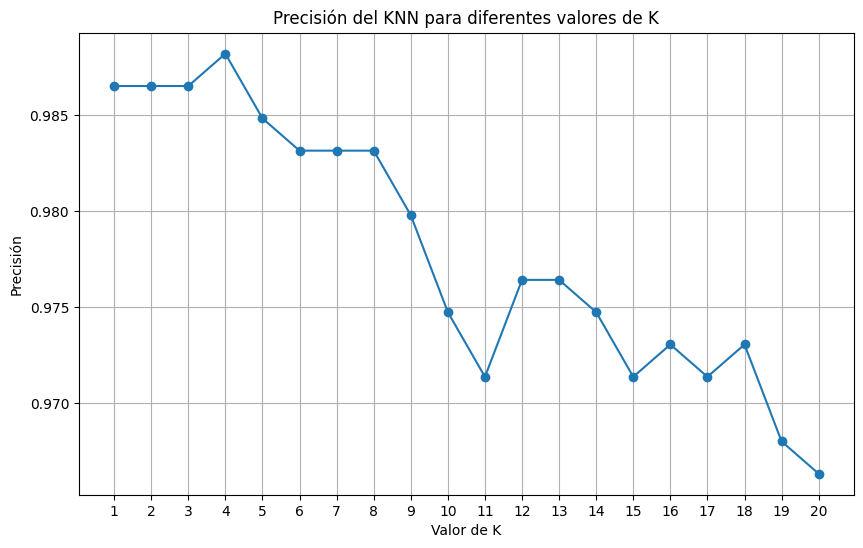

In [13]:
from sklearn.metrics import accuracy_score
import numpy as np
# Rango de valores de K que vamos a probar
k_values = range(1, 21)

# Lista para almacenar la precisión de cada modelo
accuracies = []

# Iterar sobre diferentes valores de K
for k in k_values:
    # Crear un modelo KNN con el valor actual de K
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo con el conjunto de entrenamiento
    knn.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)
    
    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    
    # Almacenar la precisión en la lista
    accuracies.append(accuracy)


# Graficar la precisión en función de K
# Graficar la precisión en función de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')

# Configurar el eje x para que tenga solo valores enteros
plt.xticks(np.arange(1, 21, step=1))

plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Precisión del KNN para diferentes valores de K')
plt.grid(True)
plt.show()


## ANÁLISIS:

### Evaluando los resultados generando un *reporte de clasificación* el cual evalua el rendimiento de varias medidas

In [14]:
from sklearn.metrics  import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.94      1.00      0.97        60
           2       0.98      0.97      0.97        59
           3       1.00      0.97      0.98        60
           4       0.98      0.97      0.97        60
           5       0.98      0.97      0.97        60
           6       0.98      1.00      0.99        60
           7       0.89      1.00      0.94        59
           8       0.96      0.88      0.92        58
           9       0.96      0.93      0.95        59

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



- Precision: Numero total de predicciones correctas para un número dado dividido por el total de predicciones para ese digito.
- Recall: Número total de predicciones correctas para un número dividido por el total de muestras que debieron de ser predecidas como ese digito.
- F1-score: Promedio entre precisión y recall
- Support: Número de muestras con un valor esperado.

### Evaluando los resultados mirando la **Matriz de Confusión**.

Una matriz de confusión es una matriz que muestra como las observaciones de cada fila(cada clase) fueran clasificadas (respecto a cada columna). Como el nombre lo indica, estas matrices son utiles para identificar areas donde el clasificador pueda estar "confuso". Por ejemplo donde este consistentemente clasifica mal una categoria particular.

In [15]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
confusion

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 57,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  4,  1,  0,  0,  0,  1,  1, 51,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  3,  0, 55]])

Se visualiza tambien el "Mapa de calor" usando la función **heatmap**. Para responder la posible pregunta ¿Hay algún número que tienda a ser clasificado mal?

Text(0.5, 1.0, 'Confusion Matrix For MNIST dataset')

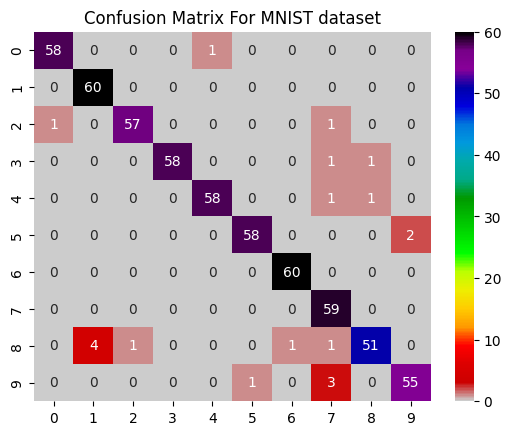

In [16]:
import seaborn as sns
s = sns.heatmap(confusion, annot=True, cmap='nipy_spectral_r')
s.set_title("Confusion Matrix For MNIST dataset")



## Obteniendo rendimiento de medidas específicas

Se puede obtener la precisión general (número correcto/numero de observaciones) usando **knn.score** o **metrics.acurracy.score**.

In [17]:
# Calculo la precisión total usando knn.score:
acc = knn.score(X_test, y_test)
print (f'Precisión de knn.score = {acc:.4}')

# Calculo la precisión total usando metrics.acurracy_score:
from sklearn import metrics
acc =metrics.accuracy_score(y_test, y_pred)
print (f'Precisión de metrics.acurracy_score = {acc:.4}')

#Tambien se puede hallar una precisión "balanceada" la cual asume que el número de muestras para cada objetivo es el mismo.
acc = metrics.balanced_accuracy_score(y_test,y_pred)
print (f'Precisión balanceada con metrics.acurracy_score = {acc:.4}')

Precisión de knn.score = 0.9663
Precisión de metrics.acurracy_score = 0.9663
Precisión balanceada con metrics.acurracy_score = 0.9661


## Implemento de la Función de Decisión de Clase con *Regresión Logística*

In [18]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Crear un clasificador de regresión logística para cada dígito (0-9)
classifiers = [LogisticRegression(max_iter=10000) for _ in range(10)]

# Entrenar cada clasificador usando un enfoque one-vs-rest (OvR)
for i in range(10):
    # Crear un vector de etiquetas binarias para la clase actual
    y_train_binary = (y_train == i).astype(int)
    classifiers[i].fit(X_train, y_train_binary)

# Obtener las probabilidades de predicción para cada clasificador
probabilities = np.zeros((X_test.shape[0], 10))  # Para almacenar las probabilidades
for i in range(10):
    probabilities[:, i] = classifiers[i].predict_proba(X_test)[:, 1]

# La clase final se elige como la que tiene la mayor probabilidad
y_pred_logistic = np.argmax(probabilities, axis=1)

probabilities

array([[9.99191918e-01, 1.72726279e-12, 8.29279801e-08, ...,
        1.04845213e-10, 2.25162061e-09, 1.87976343e-08],
       [7.20599446e-04, 5.48640952e-18, 2.33450970e-05, ...,
        4.81575050e-08, 3.93808421e-07, 9.93379852e-01],
       [1.29811529e-08, 1.32622403e-16, 5.49326750e-17, ...,
        2.76512432e-05, 1.52802316e-09, 1.51143163e-28],
       ...,
       [3.53898251e-14, 3.68545285e-12, 9.96114896e-01, ...,
        8.55419803e-18, 1.02309181e-03, 1.05197158e-25],
       [4.09042263e-12, 2.59076321e-05, 9.90736380e-01, ...,
        6.54182549e-11, 7.84188242e-07, 5.87097216e-07],
       [1.42162667e-13, 1.45011710e-05, 9.99925260e-01, ...,
        6.91462712e-12, 2.74247994e-05, 3.23937561e-11]])

### Visualización:

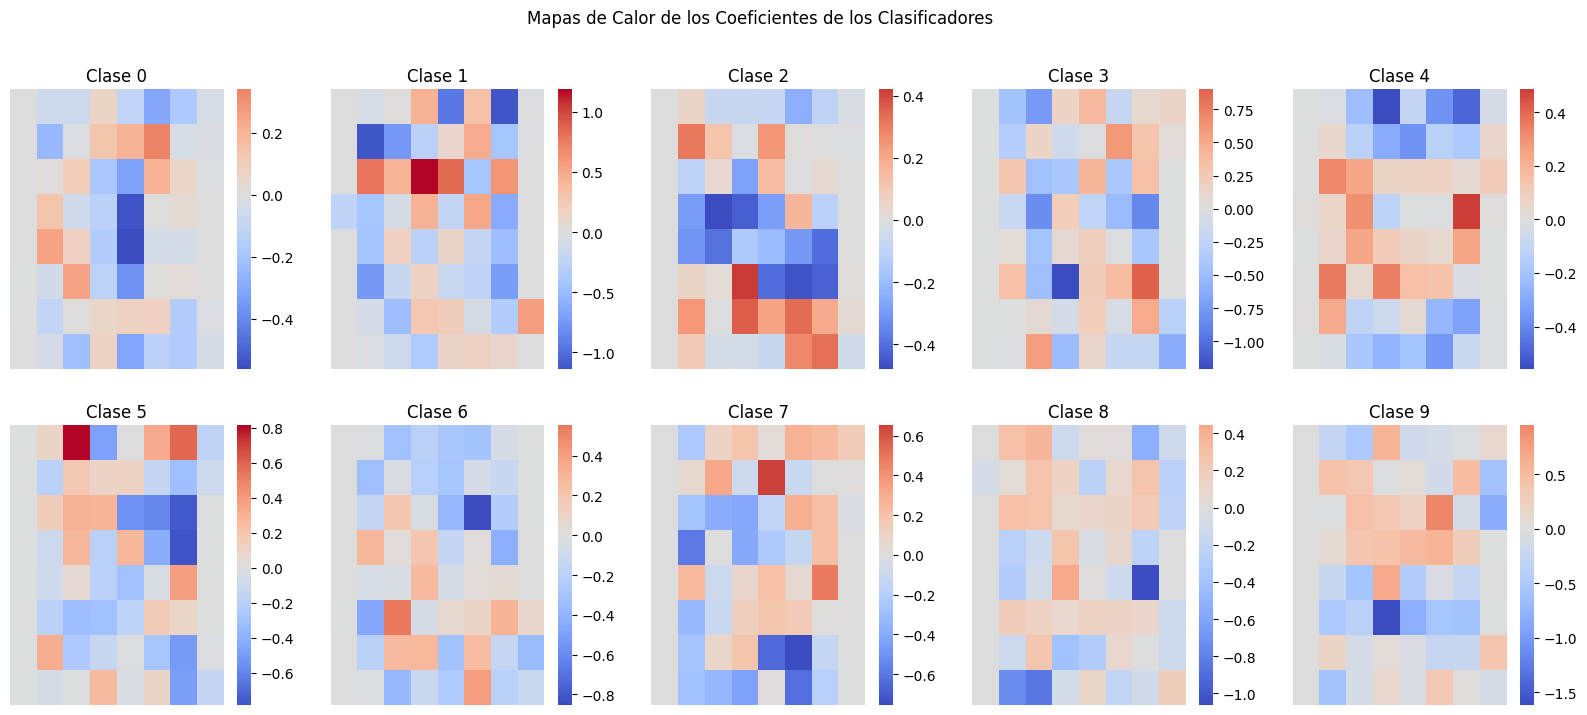

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para las gráficas
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

# Visualizar los coeficientes de cada clasificador como un mapa de calor
for i in range(10):
    # Reshape de los coeficientes a la forma original de las imágenes (8x8)
    theta_i = classifiers[i].coef_.reshape(8, 8)
    
    # Crear un mapa de calor
    sns.heatmap(theta_i, ax=axes[i], cmap='coolwarm', center=0)
    axes[i].set_title(f'Clase {i}')
    axes[i].axis('off')

plt.suptitle('Mapas de Calor de los Coeficientes de los Clasificadores')
plt.show()


### Interpretación del Mapa de Calor para Cada Clasificador

Cuando se realizar un mapa de calor para cada clasificador, indicando la clase que detecta, la intención es visualizar los pesos del modelo de regresión logística para cada clase (dígito del 0 al 9) en forma de imagen.


- **Cada clasificador** en este caso es un modelo de regresión logística entrenado para distinguir entre una clase particular y todas las demás. Por lo tanto, tendrás 10 clasificadores, uno para cada dígito del 0 al 9.
- **Los pesos (`θ_i`) de cada clasificador** se pueden reorganizar en una matriz que tiene la misma forma que las imágenes de entrada (en este caso, 8x8 píxeles). Estos pesos representan la "importancia" de cada píxel para predecir si la imagen pertenece a esa clase.
- **El mapa de calor** muestra estos pesos visualmente, donde los colores representan la magnitud y dirección (positiva o negativa) de los pesos. Los colores más intensos en el mapa indican los píxeles que tienen más influencia en la clasificación para esa clase en particular.

**Interpretación del Mapa de Calor:**

- **Zonas claras o intensamente coloreadas** en el mapa indican píxeles que son altamente indicativos de que la imagen pertenece a la clase correspondiente.
- **Zonas oscuras o neutras** indican píxeles que tienen poca influencia en la decisión de clase.

## Clasificador multinomial SCIKIT-LEARN

c:\Users\guill\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exactitud del Clasificador Multinomial: 0.9562


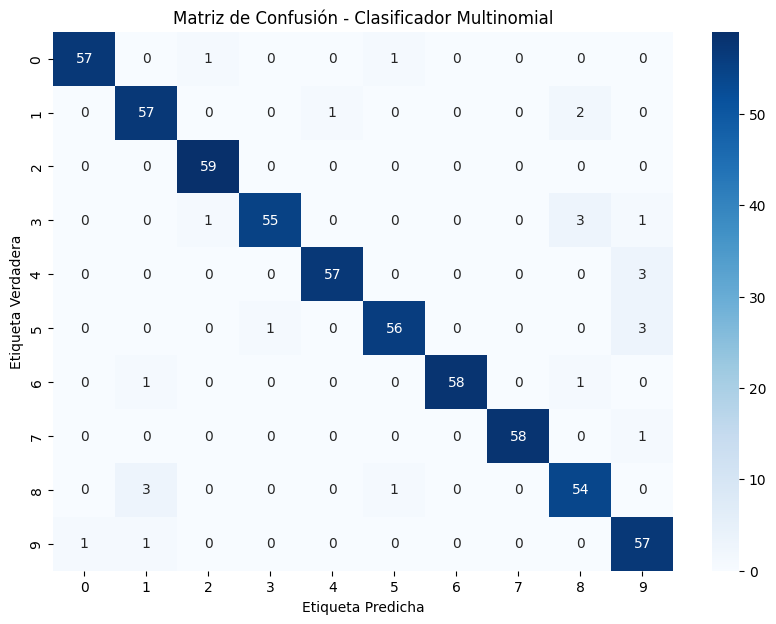

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el clasificador multinomial
multinomial_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Entrenar el modelo
multinomial_clf.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred_multinomial = multinomial_clf.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_multinomial)
print(f'Exactitud del Clasificador Multinomial: {accuracy:.4f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_multinomial)

# Graficar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Clasificador Multinomial')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


## Discusión de todos los resultados: Punto 1 MNIST DATASET:

(comparar resultados matriz de confusion kNN, confusión clasificacion multivariable y por ultimo matriz de probabilidades (función de decisión) regresion)

In [21]:
from sklearn.metrics import accuracy_score

# Exactitud para el KNN
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Exactitud del KNN: {accuracy_knn:.4f}')

# Exactitud para la Regresión Logística (clasificadores binarios)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Exactitud de la Regresión Logística: {accuracy_logistic:.4f}')

# Exactitud para el Clasificador Multinomial
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print(f'Exactitud del Clasificador Multinomial: {accuracy_multinomial:.4f}')


Exactitud del KNN: 0.9663
Exactitud de la Regresión Logística: 0.9529
Exactitud del Clasificador Multinomial: 0.9562


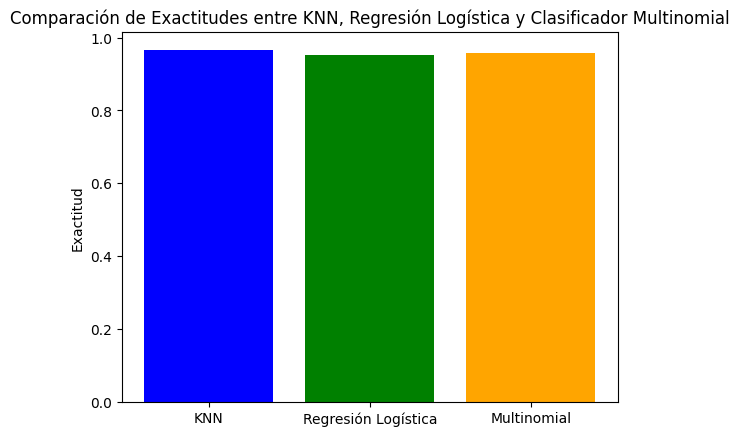

In [22]:
import matplotlib.pyplot as plt

# Comparar las exactitudes en una gráfica de barras
plt.bar(['KNN', 'Regresión Logística', 'Multinomial'], 
        [accuracy_knn, accuracy_logistic, accuracy_multinomial], color=['blue', 'green', 'orange'])

plt.ylabel('Exactitud')
plt.title('Comparación de Exactitudes entre KNN, Regresión Logística y Clasificador Multinomial')
plt.show()


El KNN obtuvo una exactitud del 96.63%, superando tanto a la regresión logística (95.29%) como al clasificador multinomial (95.62%). Esto puede deberse a que el KNN es un método no paramétrico que aprovecha la estructura local de los datos, lo que le permite adaptarse mejor a patrones complejos sin asumir relaciones lineales entre las características. En cambio, la regresión logística y el clasificador multinomial son modelos lineales que pueden tener más dificultades en capturar las no linealidades inherentes en los datos de dígitos manuscritos. Sin embargo, el KNN suele ser más costoso computacionalmente.

# Solución preguntas teóricas:
Claro, aquí tienes las respuestas a las preguntas basadas en los resultados de los modelos de clasificación que proporcionaste:

### 1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?

El valor de K en el clasificador KNN (K-Nearest Neighbors) tiene un gran impacto en el rendimiento del modelo. Un K pequeño (por ejemplo, K=1) puede hacer que el modelo sea muy sensible a los ruidos en los datos, lo que podría llevar a un sobreajuste. Por otro lado, un K grande puede suavizar demasiado la decisión, lo que podría resultar en un subajuste. En general, se busca un valor de K que equilibre la complejidad del modelo y su capacidad de generalización, lo que se puede lograr mediante técnicas como la validación cruzada.

### 2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logística? ¿Funciona uno mejor que otro?, ¿Por qué?

Las principales diferencias entre KNN y regresión logística son:

- **Modelo**: KNN es un método basado en instancias que clasifica un punto basado en la mayoría de sus vecinos más cercanos, mientras que la regresión logística es un modelo paramétrico que estima la probabilidad de que una instancia pertenezca a una clase basándose en una combinación lineal de características.

- **Interpretabilidad**: La regresión logística proporciona coeficientes que indican la influencia de cada característica, lo que facilita la interpretación. KNN, por otro lado, es menos interpretable porque no proporciona un modelo explícito.

- **Rendimiento**: KNN en este proyecyo tiene una exactitud más alta (0.9663) en comparación con la regresión logística (0.9529). Esto sugiere que, en este caso específico, KNN funciona mejor. Sin embargo, esto puede depender de la naturaleza de los datos; KNN puede ser más efectivo en conjuntos de datos con patrones no lineales, mientras que la regresión logística es adecuada para relaciones lineales.

### 3. ¿El clasificador de regresión logística presenta un buen rendimiento? ¿Cómo evalúan su rendimiento? ¿Si el rendimiento no es bueno, qué cree que se debe hacer para mejorarlo?

La regresión logística presenta un rendimiento razonable con una exactitud de 0.9529, que es bastante buena, pero no tan alta como la del KNN. Para evaluar el rendimiento de un clasificador, se pueden utilizar varias métricas además de la exactitud, como la precisión, la recuperación, la F1-score y la curva ROC-AUC, que proporcionan una visión más completa del rendimiento del modelo, especialmente en conjuntos de datos desbalanceados.

Si el rendimiento no es bueno, algunas estrategias para mejorarlo podrían incluir:

- **Ajuste de hiperparámetros**: Probar diferentes configuraciones de regularización o métodos de optimización.
- **Ingeniería de características**: Crear nuevas características o transformar las existentes para capturar mejor la información.
- **Recolección de más datos**: Aumentar el tamaño del conjunto de datos puede ayudar a mejorar la generalización del modelo.
- **Uso de técnicas de balanceo**: Si hay clases desbalanceadas, se pueden aplicar técnicas como el sobremuestreo o submuestreo.
- **Pruebas con otros modelos**: Experimentar con otros algoritmos de clasificación que puedan ser más adecuados para los datos en cuestión.


# Regresión Lineal: Datos artificiales

En el archivo .csv adjunto se encuentra una base de datos creada artificialmente, donde la salida es una funcion de dos variables, es decir $y^{(i)} = f\left(x_1^{(i)},x_2^{(i)}\right)+\eta^{(i)}$, donde $\eta$ respresenta el error de medición. El objetivo de este problema es que lo resuelvan utilizando regresión lineal y los conocimientos obtenidos en clase.

Para solucionar este problema deben realizar las siguientes tareas:

1. Cargen los datos.
2. Realicen un análisis descriptivo de los datos .
3. Implementen un modelo de regresión lineal que se ajuste a los datos proporcionados.
4. Graffique los datos originales, y los obtenidos por el modelo de regresión que ustedes implementarón.
5. Discuta los resultados obtenidos.

Como el objetivo es evaluar sus conocimientos en regresión, deben responder las siguientes preguntas:

1. ¿Cómo evaluarón que la regresión fuera adecuada?
2. ¿Realizarón algún tipo de transformación no lineal a los datos de entrada? Si fue así, ¿Qué transformación realizarón y por qué?
3. ¿Considera que lso resultados obtenidos son adecuados, o se pueden mejorar?
4. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de regresión lineal y como se aplicó en este proyecto.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


# Se configura las gráficas para presentarlas ahi mismo y no en ventana aparte.
%matplotlib inline

In [24]:
# Cargar los datos
data = pd.read_csv('RegressionData.csv')

# Separar variables independientes (X) y dependiente (y)
X = data[['X1', 'X2']].values
y = data['y'].values

# Análisis descriptivo de los datos
print(data.describe())  # Descripción estadística
print(data.head())  # Primeras 5 filas para inspección

                X1           X2            y
count  1000.000000  1000.000000  1000.000000
mean     -3.263196     0.073797     0.996858
std      99.896532     1.997194     0.791569
min    -323.203780    -6.144331    -0.650879
25%     -71.263595    -1.240731     0.331548
50%      -3.043251     0.099402     0.947372
75%      61.056271     1.347746     1.649241
max     357.839694     7.139736     3.325075
           X1        X2         y
0   53.766714  1.347397  0.594013
1  183.388501 -1.338226  0.505659
2 -225.884686 -0.800645  0.253316
3   86.217332 -1.343605  0.453381
4   31.876524  1.151258  1.720519


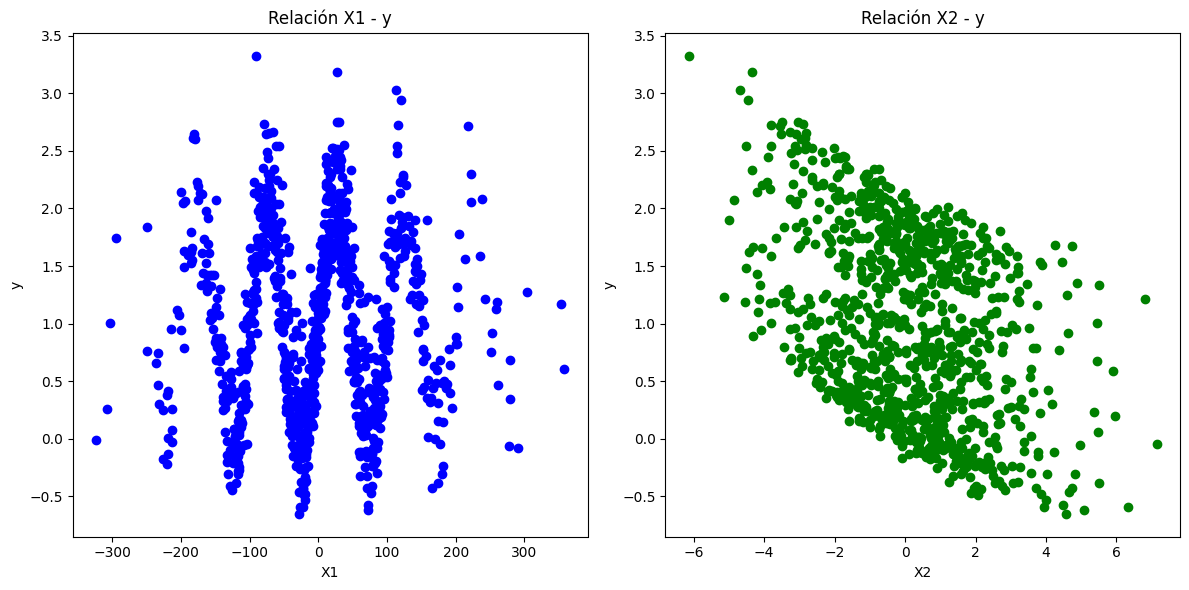

In [25]:
# Graficar relación de las variables independientes con la dependiente
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['X1'], y, color='blue')
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Relación X1 - y')

plt.subplot(1, 2, 2)
plt.scatter(data['X2'], y, color='green')
plt.xlabel('X2')
plt.ylabel('y')
plt.title('Relación X2 - y')

plt.tight_layout()
plt.show()

In [26]:
# Aplicar transformación polinómica
poly = PolynomialFeatures(degree=2)  # Puedes cambiar el grado del polinomio según sea necesario
X_poly = poly.fit_transform(X)

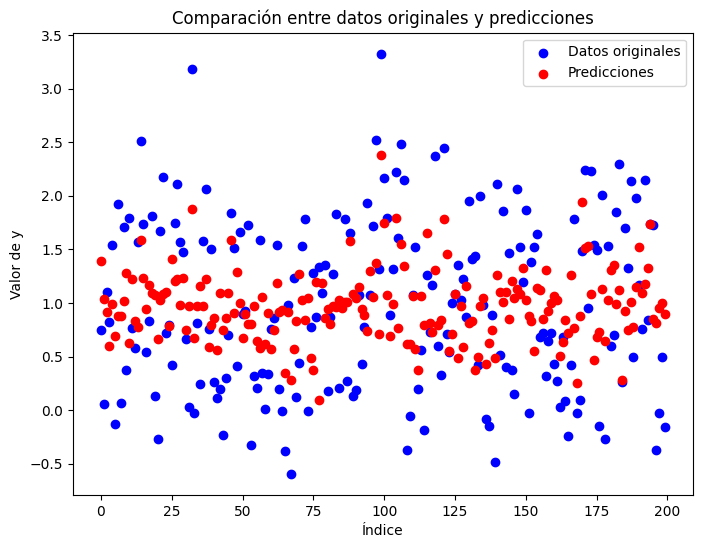

In [27]:
# Implementar modelo de regresión lineal
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Graficar datos originales y ajustados por el modelo
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Datos originales')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicciones')
plt.xlabel('Índice')
plt.ylabel('Valor de y')
plt.legend()
plt.title('Comparación entre datos originales y predicciones')
plt.show()

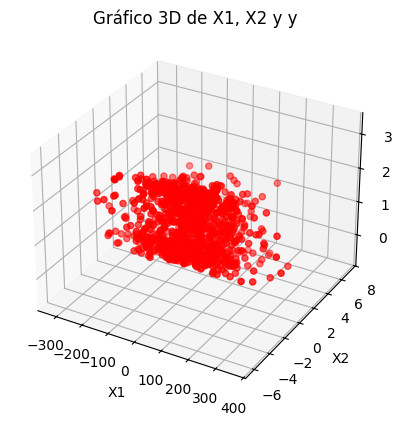

In [28]:

from mpl_toolkits.mplot3d import Axes3D

# Crear una figura y un eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

# Título del gráfico
ax.set_title('Gráfico 3D de X1, X2 y y')

# Mostrar el gráfico
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 5. Discusión de los resultados
score = model.score(X_test, y_test)
print(f'El modelo de regresión lineal tiene un R^2 de: {score:.4f}')

# Coeficientes obtenidos
print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

#  Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error Absoluto Medio (MAE): {mae}')


El modelo de regresión lineal tiene un R^2 de: 0.2018
Coeficientes del modelo: [ 0.00000000e+00  1.17772214e-04 -1.65309165e-01 -4.02620139e-06
  1.35762498e-04  8.58398039e-03]
Intercepto del modelo: 1.012450080789365
Error Cuadrático Medio (MSE): 0.49925435981892646
Error Absoluto Medio (MAE): 0.6247337557970154
